In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('dadosConcentracao.csv', header=None)
df1

,0,1,2
0,0,100,0
1,1,86,7
2,2,84,8
3,3,78,11
4,4,78,11
...,...,...,...
18713,18713,2,49
18714,18714,2,49
18715,18715,2,49
18716,18716,2,49


In [3]:
eixo_x = df1[0].tolist()

In [4]:
eixo_y1 = df1[1].tolist()
eixo_y2 = df1[2].tolist()

Text(0.5, 1.0, 'Relação Reagentes x Produtos')

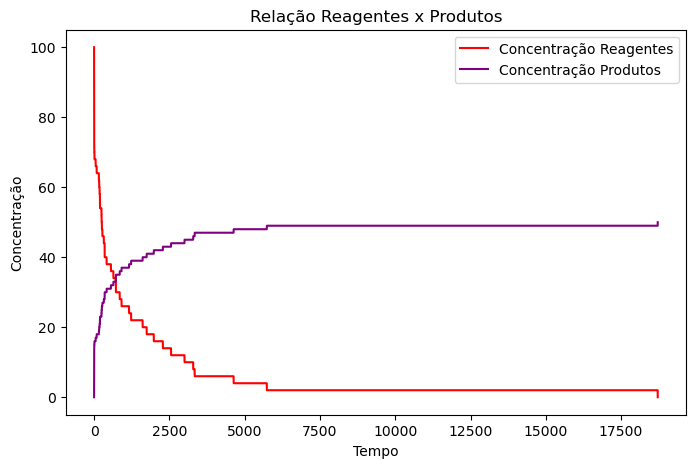

In [5]:
plt.figure(figsize=(8,5))

plt.plot(eixo_x, eixo_y1, label='Concentração Reagentes', linestyle='-', color='red')
plt.plot(eixo_x, eixo_y2, label='Concentração Produtos', linestyle='-', color='purple')

plt.xlabel('Tempo')
plt.ylabel('Concentração')

plt.legend()

plt.title('Relação Reagentes x Produtos')

In [19]:
def derivadas(y1, y2, t, p):
    c1 = {'A1':y1[0], 'B1':y1[1], 'C1':y1[2]}
    c2 = {'A2':y2[0], 'B2':y2[1], 'C2':y2[2]}

    dc1 = dict()
    dc1["A1"] = p["k_1bw"]*c["B1"] - p["k_1fw"]*c["A1"]
    dc1["B1"] = p["k_1fw"]*c["A1"] - p["k_1bw"]*c["B1"] - p["k_2"]*c["B1"]
    dc1["C1"] = p["k_2"]*c["B1"]

    dc2 = dict()
    dc2["A2"] = p["k_1bw"]*c["B2"] - p["k_1fw"]*c["A2"]
    dc2["B2"] = p["k_1fw"]*c["A2"] - p["k_1bw"]*c["B2"] - p["k_2"]*c["B2"]
    dc2["C2"] = p["k_2"]*c["B2"]

    dy1 = [dc1["A1"], dc1["B1"], dc1["C1"]]
    dy2 = [dc2["A2"], dc2["B2"], dc1["C2"]]

    return dy1,dy2

In [20]:
from chemical_kinetics import fit
import lmfit

In [24]:
parameters = {
    "k_1fw": dict(value = 0.1, min = 0),
    "k_1bw": dict(value = 0.1, min = 0),
    "k_2": dict(value = 0.1, min = 0),
    "t": dict(value = 0.1, min = 0)
}

In [41]:
from chemical_kinetics import data

ds = data.Dataset(
    files_c = ["dadosConcentracao.csv"],
    t_label = "t (a.u.)",
    t_label = "c (a.u.)"
)

In [42]:
from chemical_kinetics import plot

plot.plot_c(ds)

KeyError: 't'

<Figure size 640x480 with 0 Axes>